<a href="https://colab.research.google.com/github/affanakhan/uil/blob/master/basemap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install opencage

In [11]:
# Python program to illustrate 
# creating a data frame using CSV files 
  
# import pandas module 
import pandas as pd 
  
# creating a data frame 
df1 = pd.read_csv('https://raw.githubusercontent.com/affanakhan/uil/master/base_map.csv') 
print(df1.head()) 

   Unnamed: 0                   Name State Pop_Group  Year    Pop 
0         101               Akron OH    OH       Med  2017    570 
1         101  Albany-Schenectady NY    NY       Med  2017    610 
2         101         Albuquerque NM    NM       Med  2017    760 
3         101        Allentown PA-NJ    PA       Med  2017    680 
4         101           Anchorage AK    AK       Sml  2017    290 


In [12]:
from opencage.geocoder import OpenCageGeocode
from pprint import pprint

key = 'b39431ea50094442a9d9aaa1c61fef04'
geocoder = OpenCageGeocode(key)

In [13]:
list_lat = []   # create empty lists
list_long = []

	
for index, row in df1.iterrows(): # iterate over rows in dataframe


    City = row['Name']
    State = row['State']       
    query = str(City)+','+str(State)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long)
	
# create new columns from lists    

df1['lat'] = list_lat   
df1['lon'] = list_long


In [14]:
print(df1.head()) 

   Unnamed: 0                   Name State  ...    Pop         lat         lon
0         101               Akron OH    OH  ...    570   41.083064  -81.518485
1         101  Albany-Schenectady NY    NY  ...    610   42.814243  -73.939569
2         101         Albuquerque NM    NM  ...    760   35.084103 -106.650985
3         101        Allentown PA-NJ    PA  ...    680   40.626343  -75.458171
4         101           Anchorage AK    AK  ...    290   61.216313 -149.894852

[5 rows x 8 columns]


In [15]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756171 sha256=ff6aed87776004d2b05f9bd8eab6afe6770d4ffafdf7f6b8a44daf295077683c
  Stored in directory: /tmp/pip-ephem-wheel-cache-fpsyqyiz/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [16]:
!pip install pyproj==1.9.6

In [22]:
df1.dtypes

Unnamed: 0      int64
Name           object
State          object
Pop_Group      object
Year            int64
 Pop           object
lat           float64
lon           float64
dtype: object

In [41]:
df1.to_csv('testfile.csv') 
pd.read_csv('testfile.csv')
print (df1)


     Unnamed: 0                   Name State  ...    Pop         lat         lon
0           101               Akron OH    OH  ...    570   41.083064  -81.518485
1           101  Albany-Schenectady NY    NY  ...    610   42.814243  -73.939569
2           101         Albuquerque NM    NM  ...    760   35.084103 -106.650985
3           101        Allentown PA-NJ    PA  ...    680   40.626343  -75.458171
4           101           Anchorage AK    AK  ...    290   61.216313 -149.894852
..          ...                    ...   ...  ...     ...        ...         ...
489         393                York PA    PA  ...    239   39.962398  -76.727392
490         393       Youngstown OH-PA    OH  ...    394   41.220391  -80.518890
491         393           Yuba City CA    CA  ...    125   39.140448 -121.616911
492         393             Yuma AZ-CA    AZ  ...    139   32.692659 -114.627616
493         393         Zephyrhills FL    FL  ...     74   28.233620  -82.181195

[494 rows x 8 columns]


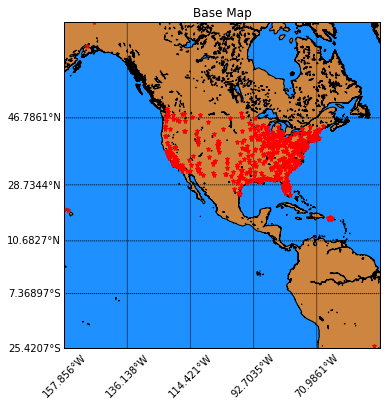

In [42]:
#!/usr/bin/python
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import csv

lats, lons,names,altitude = [],[],[],[]

# the asos_stations file can be found here: 
# https://engineersportal.com/s/asos_stations.csv
with open('testfile.csv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=',')
    for data in reader:
        names.append(data['Name'])
        lats.append(float(data['lat']))
        lons.append(float(data['lon']))
        # altitude.append(float(data['ELEV']))

# How much to zoom from coordinates (in degrees)
zoom_scale = 0

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

plt.figure(figsize=(12,6))
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='peru',lake_color='dodgerblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
m.drawmapboundary(fill_color='dodgerblue')

# build and plot coordinates onto map
x,y = m(lons,lats)
m.plot(x,y,'r*',markersize=5)
plt.title("Base Map")
plt.savefig('base_map.png', format='png', dpi=500)
plt.show()

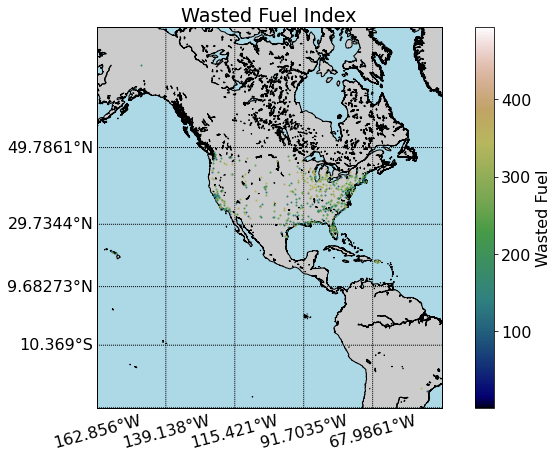

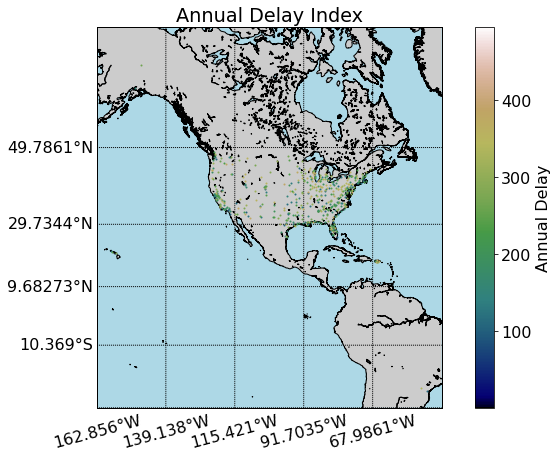

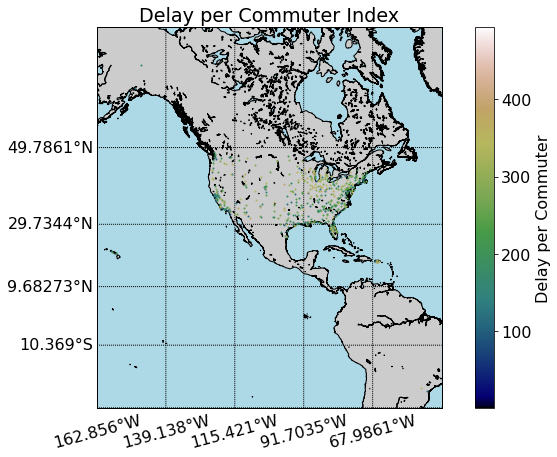

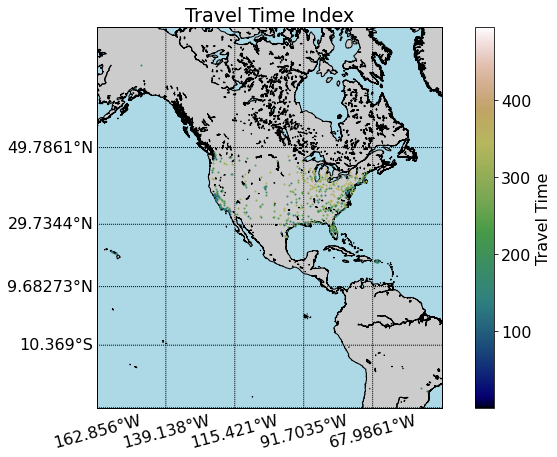

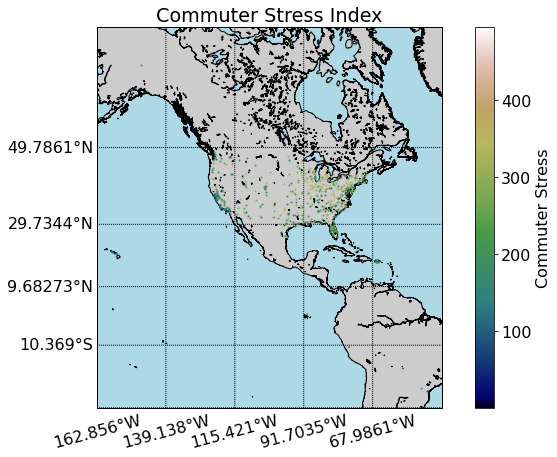

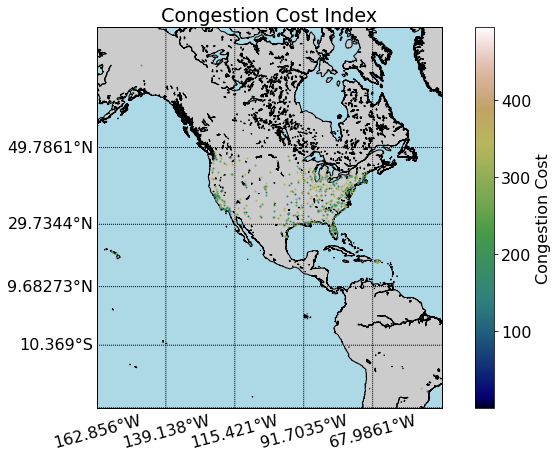

In [59]:
#!/usr/bin/python
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import csv

# setting parameters for title and axes
font = {'family' : 'verdana',
        'size'   : 16}
matplotlib.rc('font', **font)

# Grabbing the .csv data
lats,lons,names,wasted_fuel, annual_delay, delay_per, travel_time, commuter_stress, freeway_pti, congestion_cost = [],[],[],[],[],[],[],[],[],[]
temp_dat = []
with open('testfile_updated.csv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=',')
    for data in reader:
        names.append('K'+data['Name'])
        lats.append(float(data['lat']))
        lons.append(float(data['lon']))
        wasted_fuel.append(float(data['wasted_fuel']))
        annual_delay.append(float(data['annual_delay']))
        delay_per.append(float(data['delay_per']))
        travel_time.append(float(data['travel_time']))
        commuter_stress.append(float(data['commuter_stress']))
        #freeway_pti.append(float(data['freeway_pti']))
        congestion_cost.append(float(data['congestion_cost']))

def my_function(graph_name, param_name, axis_name, image_name):
  # How much to zoom from coordinates (in degrees)
  zoom_scale = 5

  # Setup the bounding box for the zoom and bounds of the map
  bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
          np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

  fig, ax = plt.subplots(figsize=(12,7))
  plt.title(graph_name)
  # Define the projection, scale, the corners of the map, and the resolution.
  m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
              llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

  # Draw coastlines and fill continents and water with color
  m.drawcoastlines()
  m.fillcontinents(color='#CCCCCC',lake_color='lightblue')

  # draw parallels, meridians, and color boundaries
  m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
  m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=15)
  m.drawmapboundary(fill_color='lightblue')

  # format colors for elevation range
  alt_min = np.min(param_name)
  alt_max = np.max(param_name)
  cmap = plt.get_cmap('gist_earth')
  normalize = matplotlib.colors.Normalize(vmin=alt_min, vmax=alt_max)

  # plot elevations with different colors using the numpy interpolation mapping tool
  # the range [50,200] can be changed to create different colors and ranges
  for ii in range(0,len(param_name)):
      x,y = m(lons[ii],lats[ii])
      color_interp = np.interp(param_name[ii],[alt_min,alt_max],[50,200])
      plt.plot(x,y,marker='o',markersize=1,color=cmap(int(color_interp)))

  # format the colorbar 
  cax, _ = matplotlib.colorbar.make_axes(ax)
  cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap,norm=normalize,label=axis_name)

  # save the figure and show it
  plt.savefig(image_name, format='png', dpi=500,transparent=True)
  plt.show()

my_function("Wasted Fuel Index", wasted_fuel, 'Wasted Fuel', 'wasted_fuel.png')
my_function("Annual Delay Index", annual_delay, 'Annual Delay', 'annual_delay.png')
my_function("Delay per Commuter Index", delay_per, 'Delay per Commuter', 'delay_per.png')
my_function("Travel Time Index", travel_time, 'Travel Time', 'travel_time.png')
my_function("Commuter Stress Index", commuter_stress, 'Commuter Stress', 'commuter_stress.png')
my_function("Congestion Cost Index", congestion_cost, 'Congestion Cost', 'congestion_cost.png')



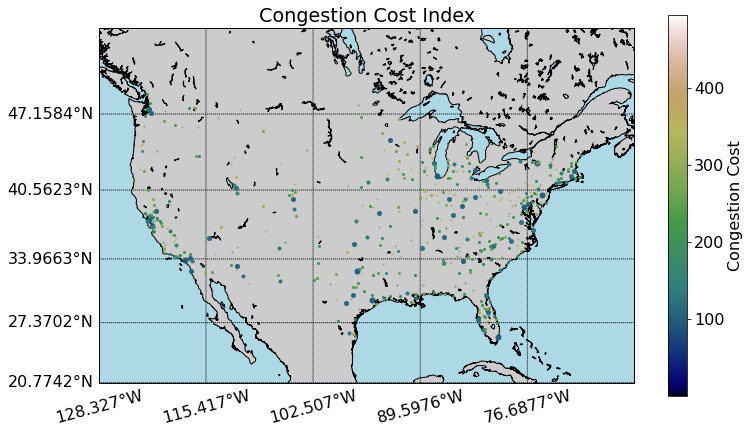

In [77]:
#!/usr/bin/python
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import csv

# setting parameters for title and axes
font = {'family' : 'verdana',
        'size'   : 16}
matplotlib.rc('font', **font)

# Grabbing the .csv data
lats,lons,names,congestion_cost,pop = [],[],[],[],[]
temp_dat = []
with open('updated_test.csv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=',')
    for data in reader:
        names.append('K'+data['Name'])
        lats.append(float(data['lat']))
        lons.append(float(data['lon']))
        congestion_cost.append(float(data['congestion_cost']))
        pop.append(float(data['Pop']))

def my_function(graph_name, param_name, axis_name, image_name):
  # How much to zoom from coordinates (in degrees)
  zoom_scale = 5

  # Setup the bounding box for the zoom and bounds of the map
  bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
          np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

  fig, ax = plt.subplots(figsize=(12,7))
  plt.title(graph_name)
  # Define the projection, scale, the corners of the map, and the resolution.
  m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
              llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

  # Draw coastlines and fill continents and water with color
  m.drawcoastlines()
  m.fillcontinents(color='#CCCCCC',lake_color='lightblue')

  # draw parallels, meridians, and color boundaries
  m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
  m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=15)
  m.drawmapboundary(fill_color='lightblue')

  # format colors for elevation range
  alt_min = np.min(param_name)
  alt_max = np.max(param_name)
  cmap = plt.get_cmap('gist_earth')
  normalize = matplotlib.colors.Normalize(vmin=alt_min, vmax=alt_max)

  # plot elevations with different colors using the numpy interpolation mapping tool
  # the range [50,200] can be changed to create different colors and ranges
  for ii in range(0,len(param_name)):
      x,y = m(lons[ii],lats[ii])
      color_interp = np.interp(param_name[ii],[alt_min,alt_max],[50,200])
      if pop[ii] > 5000:
        mark = 5
      elif pop[ii] > 1000:
        mark = 4
      elif pop[ii] > 500:
        mark = 3
      elif pop[ii] > 100:
        mark = 2
      else:
        mark = 1
      plt.plot(x,y,marker='o',markersize=mark,color=cmap(int(color_interp)))

  # format the colorbar 
  cax, _ = matplotlib.colorbar.make_axes(ax)
  cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap,norm=normalize,label=axis_name)

  # save the figure and show it
  plt.savefig(image_name, format='png', dpi=500,transparent=True)
  plt.show()

my_function("Congestion Cost Index", congestion_cost, 'Congestion Cost', 'congestion_cost.png')
